# Multiple Linear Regression on the Satellite Observations

Once a clear linear relationship between the variables retrieved from satellite observations has been discarded, we explore different statistical models that could better describe the soil moisture index. In this section we explore multiple linear regression, polynomial and interation terms within the multiple linear regression. 

Libraries we need are imported first

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import xarray as xr
from scipy.interpolate import griddata
from scipy import interpolate
import statsmodels.api as sm
import statsmodels.formula.api as smf 

Data used in this exercise is stored in the DATA folder and extracted as described in the previous sections

In [32]:
thefile = '../../../DATA/TPdata_199301'
data = pd.read_csv(thefile, sep='\t', header=None)
data.columns = ["cellNr", "latitude", "longitude", "backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi","lmd_soilWetness"]
data = data.replace('   NaN',pd.NA)
data['backscatter'] = pd.to_numeric(data['backscatter'])
data['emissivity_v'] = pd.to_numeric(data['emissivity_v'])
data['emissivity_h'] = pd.to_numeric(data['emissivity_h'])
data['ts_amplitude'] = pd.to_numeric(data['ts_amplitude'])
data['ndvi'] = pd.to_numeric(data['ndvi'])
data['lmd_soilWetness'] = pd.to_numeric(data['lmd_soilWetness'])
data = data.dropna()

## Multiple Linear Regression

In [35]:
X = data[["backscatter","emissivity_v","emissivity_h","ts_amplitude","ndvi"]] 
y = data['lmd_soilWetness'] 
X = sm.add_constant(X) 
est = sm.OLS(y, X).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lmd_soilWetness   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     9211.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:31:37   Log-Likelihood:                 17245.
No. Observations:               44531   AIC:                        -3.448e+04
Df Residuals:                   44525   BIC:                        -3.442e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.8653      0.058     15.013      0.000       0.752       0.978
backscatter      0.0074      0.001     13.743      0.000       0.006       0.008
emissivity_v     0.1046      0.084      1.243      0.214      -0.060       0.270
emissivity_h    -0.2269      0.043     -5.334      0.000      -0.310      -0.144
ts_amplitude    -0.0106      0.000    -99.962      0.000      -0.011      -0.010
ndvi             0.2148      0.007     28.885      0.000       0.200       0.229
==============================================================================
Omnibus:                      982.824   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.979
Skew:                          -0.240   Prob(JB):                    6.33e-168
Kurtosis:                       2.571   Cond. No.                     3.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alternatively, the model can be formulated as follows in the statsmodel package, with the same results

In [40]:
est = smf.ols(formula='lmd_soilWetness ~ backscatter + emissivity_v + emissivity_h + ts_amplitude + ndvi', data=data).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        lmd_soilWetness   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     9211.
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:31:50   Log-Likelihood:                 17245.
No. Observations:               44531   AIC:                        -3.448e+04
Df Residuals:                   44525   BIC:                        -3.442e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8653      0.058     15.013      0.000       0.752       0.978
backscatter      0.0074      0.001     13.743      0.000       0.006       0.008
emissivity_v     0.1046      0.084      1.243      0.214      -0.060       0.270
emissivity_h    -0.2269      0.043     -5.334      0.000      -0.310      -0.144
ts_amplitude    -0.0106      0.000    -99.962      0.000      -0.011      -0.010
ndvi             0.2148      0.007     28.885      0.000       0.200       0.229
==============================================================================
Omnibus:                      982.824   Durbin-Watson:                   0.334
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.979
Skew:                          -0.240   Prob(JB):                    6.33e-168
Kurtosis:                       2.571   Cond. No.                     3.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The r2 remains relatively low and it has been highlight potential collinearities among the input variables

## Polynomial

Focusing on ts_amplitude, it seems there is a y=1/x relationship between both variables that could fit better than the linear relationship

In [133]:
poly = smf.ols(formula='lmd_soilWetness ~ 0 + I(ts_amplitude ** -0.5)', data=data).fit()
poly.rsquared

0.9075222950424844

(0.1, 1.1)

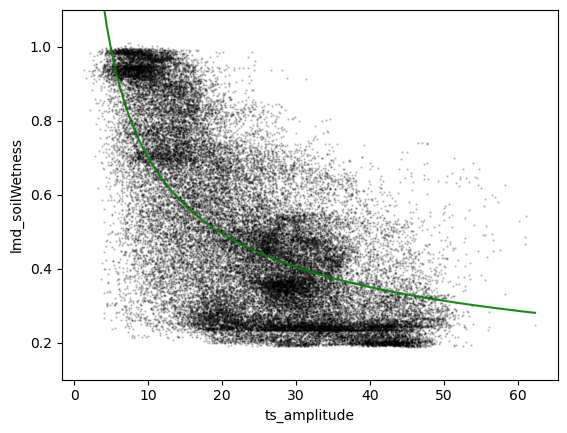

In [141]:
x = pd.DataFrame({'ts_amplitude': np.linspace(data.ts_amplitude.min(), data.ts_amplitude.max(), 100)})
ax = data.plot.scatter('ts_amplitude','lmd_soilWetness',s=.5,color='k',alpha=0.2)
ax.plot(x.ts_amplitude, poly.predict(x), 'g-', label='Poly n=2 $R^2$=%.2f' % poly.rsquared,
alpha=0.9)
ax.set_ylim(0.1,1.1)

## Interaction Terms